In [1]:
# 텐서플로우(TensorFlow)의 표준 API인 tf.keras의 Sequential API를 이용하여 숫자 손글씨 인식기를 만들기

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))  # x_train 배열의 크기를 출력
print(x_train[0].shape)  # 첫 번째 training 데이터의 크기 출력

2023-08-04 15:01:49.570096: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.13.0
60000
(28, 28)
()


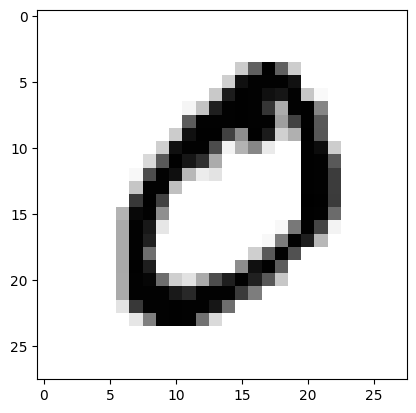

In [4]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [2]:
# 그렇다면 Y항목에는 어떤 값이 들어 있을까요? y_train 행렬의 2번째 값을 확인해 봅시다.

print(y_train[1])

0


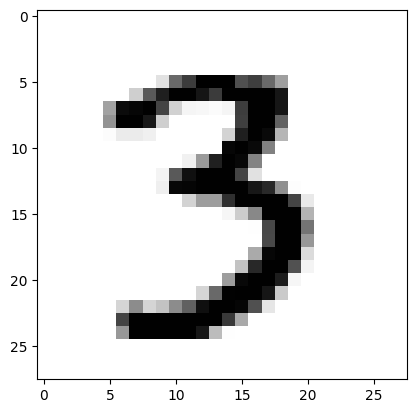

10001 번째 이미지의 숫자는 바로  3 입니다.


In [3]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
#자 그러면 우리가 불러들인 학습용 데이터는 과연 몇 장일까요? 아래 코드를 실행시켜 봅시다.
print(x_train.shape)

(60000, 28, 28)


In [6]:
# 이번에는 테스트용 데이터는 몇 장이 있는지 확인해 보겠습니다.
print(x_test.shape)

(10000, 28, 28)


In [7]:
# 데이터 전처리
#숫자 손글씨 이미지의 실제 픽셀 값은 0~255 사이의 값을 가집니다. 한번 확인해 볼까요?
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
# 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋습니다. MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 됩니다. 최소값이 0, 최대값이 1에 근접하도록 나오는지 확인해 봅시다.

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [9]:
#2-3. 딥러닝 네트워크 설계하기
# tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계한 예
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [10]:
#딥러닝 네트워크 모델을 확인해 보려면, model.summary() 메소드를 이용하면 됩니다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [11]:
#2-4. 딥러닝 네트워크 학습시키기
# 우리가 만든 네트워크의 입력은 (데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 와 같은 형태를 가집니다. 이전 스텝에서 첫 번째 레이어에 input_shape=(28,28,1)로 지정했던 것을 기억하시나요?
# 그런데 print(x_train.shape) 을 해보면, (60000, 28, 28) 로 채널수에 대한 정보가 없습니다. 따라서 (60000, 28, 28, 1) 로 만들어 주어야 합니다 (여기서 채널수 1은 흑백 이미지를 의미합니다. 컬러 이미지라면 R, G, B 세 가지 값이 있기 때문에 3이겠죠?).

print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
#x_train 학습 데이터로 딥러닝 네트워크를 학습시켜 봅시다. 여기서 epochs=10 은 전체 60,000개의 데이터를 10번 반복 사용해서 학습을 시키라는 뜻입니다. 물론 model의 입력 정의에 형태를 맞춘 x_train_reshaped가 사용되어야겠죠. 자 그러면 코드를 실행해 봅시다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1935 - accuracy: 0.9408
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0623 - accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0442 - accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0280 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0193 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0160 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0131 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - los

In [13]:
# 테스트 데이터로 성능을 확인해 보자
# 사실 위의 인식 정확도는 학습용 데이터(x_train)을 가지고 구한 것입니다. 즉, 연습문제를 잘푸는 인공지능을 만든 거죠. 우리가 만든 딥러닝 네트워크는 실제 시험도 잘 볼 수 있을까요?
# 자 그러면 시험용 데이터(x_test)를 가지고 확인해 봅시다.

test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 1s - loss: 0.0396 - accuracy: 0.9894 - 1s/epoch - 5ms/step
test_loss: 0.03955759108066559
test_accuracy: 0.9894000291824341


In [14]:
# 어떤 데이터를 잘못 추론했을까? 눈으로 확인해 보자
#model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있습니다. 우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수입니다. 이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 되는 거죠.

predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])


313/313 [==============================] - 1s 4ms/step
model.predict() 결과 :  [1.6070192e-10 2.7743616e-10 8.9823504e-10 3.9169420e-10 7.5676336e-14
 4.9488323e-11 1.2238061e-14 9.9999994e-01 1.3226060e-11 4.3261640e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


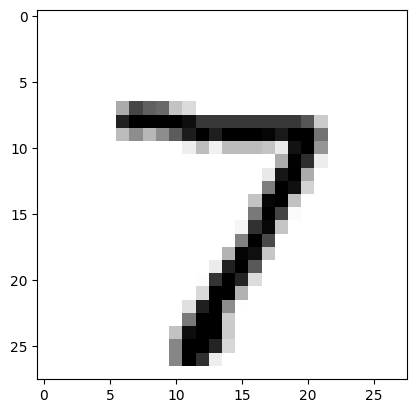

In [15]:
# model이 추론한 결과가 7일 확률이 1.00에 근접하고 있다, 즉 이 model은 입력한 이미지가 숫자 7이라는 걸 아주 확신하고 있다는 뜻이 됩니다.

# 정말 숫자 7인가요?

plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [6.8153923e-08 4.7470498e-01 4.8314940e-04 1.6871306e-06 2.3503120e-01
 2.1130686e-06 1.1225677e-06 2.3002565e-05 1.4364572e-03 2.8831619e-01]
라벨: 9, 예측결과: 1


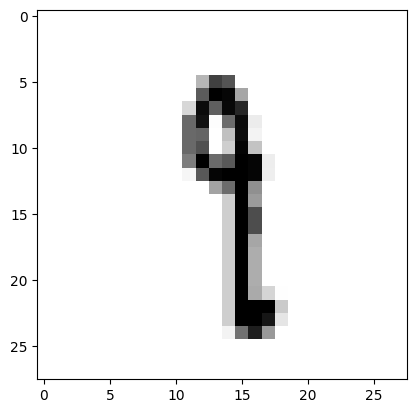

예측확률분포: [2.2604244e-03 2.7364449e-11 3.3698419e-07 8.3049287e-07 2.2892102e-04
 2.8283048e-01 7.1466297e-01 1.5401025e-12 1.3328449e-05 2.6137914e-06]
라벨: 5, 예측결과: 6


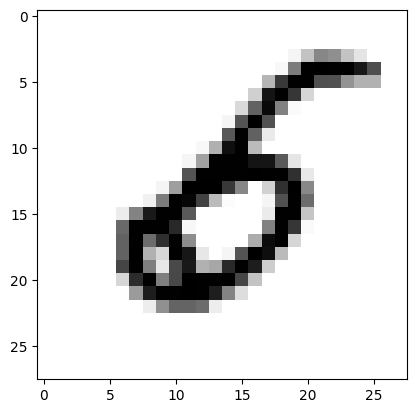

예측확률분포: [2.1682681e-08 6.1782801e-01 6.3036932e-05 1.6196163e-06 5.6517142e-09
 8.9806873e-09 1.1236940e-09 3.8210195e-01 4.9590185e-06 3.9245512e-07]
라벨: 7, 예측결과: 1


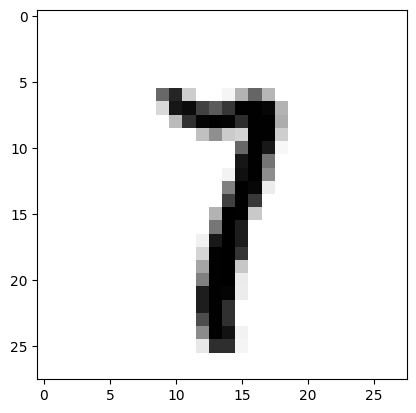

예측확률분포: [1.5236880e-08 7.4712980e-01 7.1777035e-06 7.0957680e-07 6.9823128e-04
 2.4149704e-06 7.5191414e-10 2.5165674e-01 4.7968712e-07 5.0447759e-04]
라벨: 7, 예측결과: 1


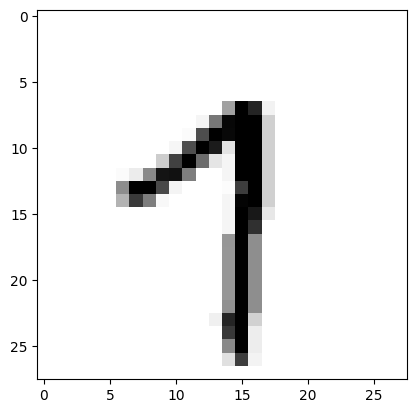

예측확률분포: [8.67852032e-01 2.55481303e-09 5.77263108e-06 2.15906803e-05
 3.39053145e-07 1.69470422e-02 2.01350078e-04 7.27329030e-10
 1.14956416e-01 1.54631016e-05]
라벨: 8, 예측결과: 0


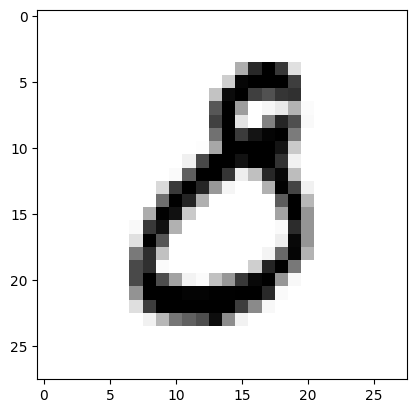

In [16]:
# 그렇다면 model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인해 볼 수도 있겠습니다.

import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [17]:
# 더 좋은 네트워크 만들어 보기
# 그러면 인식률을 99점대로 만들 수 없을까요? 딥러닝 네트워크의 구조 자체는 바꾸지 않으면서도 우리가 해볼 수 있는 것들이 있습니다. 3번째 스텝 딥러닝 네트워크 설계하기에서 살펴본 하이퍼파라미터들을 바꾸어 보는 것인데요. Conv2D 레이어에서 입력 이미지의 특징 수를 늘리거나 줄여 보거나, Dense 레이어에서 뉴런수를 바꾸어 보거나, 학습 반복 횟수인 epoch 값을 변경해 볼 수 있을 겁니다.

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [18]:
# 하이퍼파라미터를 바꾸어가면서 시험용 데이터(x_test)에 대한 인식률을 확인해 봅시다. 최고로 높은 점수를 얻은 네트워크 모델 코드와 그 때의 시험용 데이터 인식률 값을 올려주세요.

# 코드를 조금 수정하여 하이퍼파라미터들을 변경해 시험용 데이터 인식률을 올릴 수 있습니다. 다음은 변경된 하이퍼파라미터를 사용한 코드입니다. 주요 변경 사항:
# 필터 개수 증가: n_channel_1 = 32, n_channel_2 = 64
# Dense layer의 뉴런 개수 증가: n_dense = 64
# 학습 에폭(epoch) 증가: n_train_epoch = 20

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 데이터의 채널 차원 변경
x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               